In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#reading the data
train=pd.read_csv("/content/drive/MyDrive/accident risk score/train.csv")
test=pd.read_csv("/content/drive/MyDrive/accident risk score/test.csv")
pop=pd.read_csv("/content/drive/MyDrive/accident risk score/population.csv")
road=pd.read_csv("/content/drive/MyDrive/accident risk score/roads_network.csv")

In [ ]:
train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [ ]:
10/7

1.4285714285714286

In [ ]:
test.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,14,13,2,0,06/10/13,6,13:28,218,E10000032,4,...,Daylight: Street light present,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom
1,17,13,2,0,22/04/13,7,9:30,157,E10000034,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom
2,21,13,2,0,27/09/13,3,19:10,155,E09000012,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom
3,23,13,2,0,13/03/13,4,9:19,26,E10000016,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom
4,28,14,2,0,13/06/13,1,14:59,6,E08000012,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom


In [ ]:
train.shape

(478741, 27)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478741 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  478741 non-null  int64 
 1   Police_Force                                 478741 non-null  int64 
 2   Number_of_Vehicles                           478741 non-null  int64 
 3   Number_of_Casualties                         478741 non-null  int64 
 4   Date                                         478741 non-null  object
 5   Day_of_Week                                  478741 non-null  int64 
 6   Time                                         478727 non-null  object
 7   Local_Authority_(District)                   478741 non-null  int64 
 8   Local_Authority_(Highway)                    478741 non-null  object
 9   1st_Road_Class                               478741 non-null  int64 
 

In [ ]:
train['Number_of_Casualties'].sum()

700651

In [ ]:
train.describe()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
count,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.0,478741.000000
mean,299892.954673,31.610178,1.745695,1.463528,4.367898,357.457132,4.381542,946.663375,37.035976,2.430068,0.0,1.402050
std,173261.274950,24.941660,0.626458,0.816019,1.872983,256.530105,1.369579,1730.926876,12.854299,3.268563,0.0,0.490313
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,0.0,1.000000
25%,149718.000000,12.000000,1.000000,1.000000,3.000000,103.000000,3.000000,10.000000,30.000000,-1.000000,0.0,1.000000
50%,299791.000000,33.000000,2.000000,1.000000,5.000000,314.000000,4.000000,336.000000,30.000000,3.000000,0.0,1.000000
75%,449990.000000,45.000000,2.000000,2.000000,6.000000,521.000000,6.000000,569.000000,40.000000,6.000000,0.0,2.000000
max,599999.000000,98.000000,4.000000,5.000000,7.000000,941.000000,6.000000,9832.000000,70.000000,6.000000,0.0,2.000000


In [ ]:
train['Accident_ID'].sum()

143571053013

In [ ]:
train['Accident_ID'].count()

478741

In [ ]:
train.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [ ]:
train['Time'].fillna(train['Time'].mode()[0], inplace=True)

train['Road_Surface_Conditions'].fillna(train['Road_Surface_Conditions'].mode()[0], inplace=True)

train['Special_Conditions_at_Site'].fillna(train['Special_Conditions_at_Site'].mode()[0], inplace=True)

In [ ]:
# Removing columns '2nd_Road_Number' and 'country' from train file as it represent only single value

train.drop(['2nd_Road_Number','country'], axis=1, inplace=True)

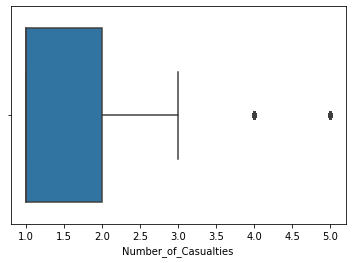

In [ ]:
sns.boxplot(train['Number_of_Casualties'])

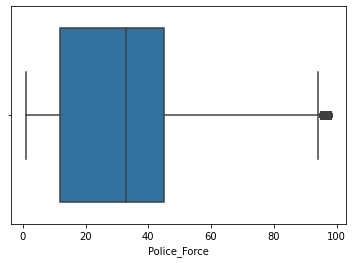

In [ ]:
sns.boxplot(train['Police_Force'])

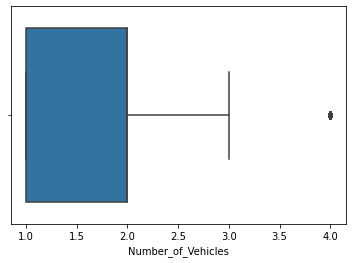

In [ ]:
sns.boxplot(train['Number_of_Vehicles'])

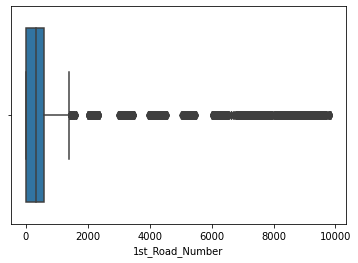

In [ ]:
sns.boxplot(train['1st_Road_Number'])

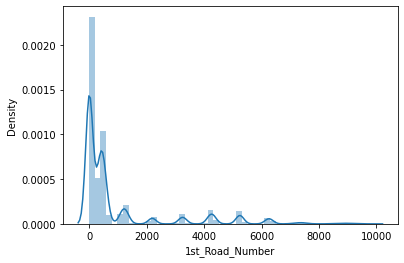

In [ ]:
sns.distplot(train['1st_Road_Number'])

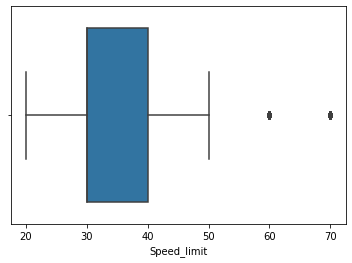

In [ ]:
sns.boxplot(train['Speed_limit'])

In [ ]:
train['postcode'].value_counts()

OX20 1TE    29
B32 1AG     29
SM7 3AS     27
LE6 0GF     27
TQ10 9ER    26
            ..
SE13 6DF     1
PL1 5QR      1
SE8 5DQ      1
LU2 0SQ      1
RM11 1JU     1
Name: postcode, Length: 95625, dtype: int64

In [ ]:
train.corr()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,Urban_or_Rural_Area
Accident_ID,1.000000,-0.001033,0.002349,0.000017,-0.001168,-0.001064,-0.001796,-0.000182,-0.000025,-0.001120,0.000919
Police_Force,-0.001033,1.000000,-0.051907,-0.003210,0.015046,0.775673,-0.088050,-0.031027,-0.002867,-0.096677,0.057068
Number_of_Vehicles,0.002349,-0.051907,1.000000,0.031821,-0.018441,-0.043192,-0.051702,0.059774,-0.082969,0.217116,-0.109092
Number_of_Casualties,0.000017,-0.003210,0.031821,1.000000,-0.001794,-0.000762,-0.053381,0.025284,0.038132,-0.021124,0.040450
Day_of_Week,-0.001168,0.015046,-0.018441,-0.001794,1.000000,0.016508,-0.030685,0.002710,0.033181,-0.034128,0.038020
Local_Authority_(District),-0.001064,0.775673,-0.043192,-0.000762,0.016508,1.000000,-0.099158,-0.007074,-0.009975,-0.085178,0.062190
1st_Road_Class,-0.001796,-0.088050,-0.051702,-0.053381,-0.030685,-0.099158,1.000000,-0.157490,-0.264339,0.103189,-0.278628
1st_Road_Number,-0.000182,-0.031027,0.059774,0.025284,0.002710,-0.007074,-0.157490,1.000000,0.026580,0.018497,0.055237
Speed_limit,-0.000025,-0.002867,-0.082969,0.038132,0.033181,-0.009975,-0.264339,0.026580,1.000000,-0.301957,0.515550
2nd_Road_Class,-0.001120,-0.096677,0.217116,-0.021124,-0.034128,-0.085178,0.103189,0.018497,-0.301957,1.000000,-0.360310


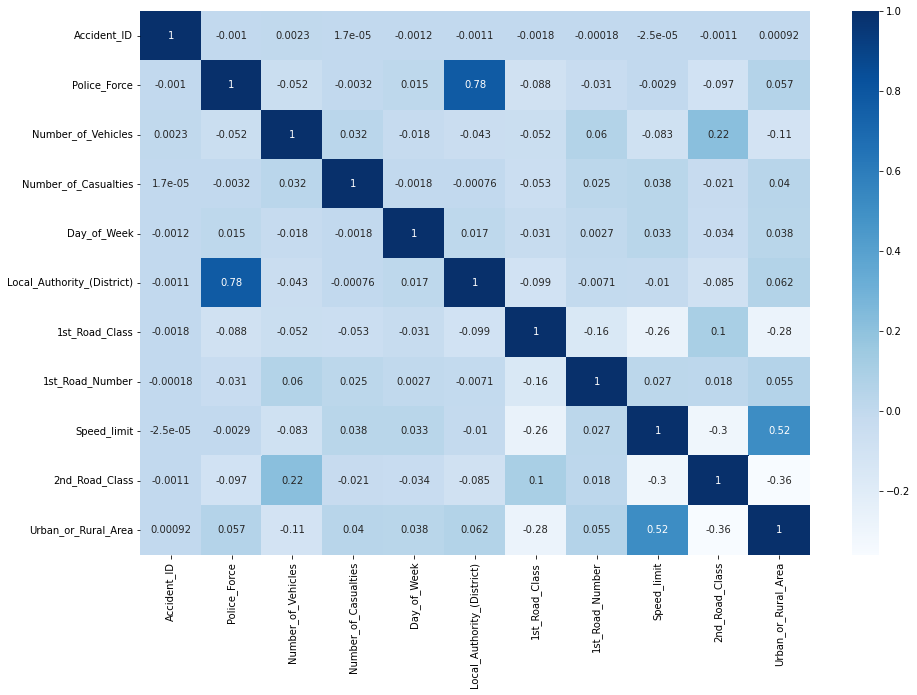

In [ ]:
corrmat= train.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(train[top_corr_feature].corr(), annot=True, cmap="Blues")

In [ ]:
#visualization of postcode versus Number_of_Casualties_x
# import matplotlib
# matplotlib.rcParams["figure.figsize"]=(12,10)
# sns.barplot("postcode","Number_of_Casualties_x",hue="Weather_Conditions",data=train)

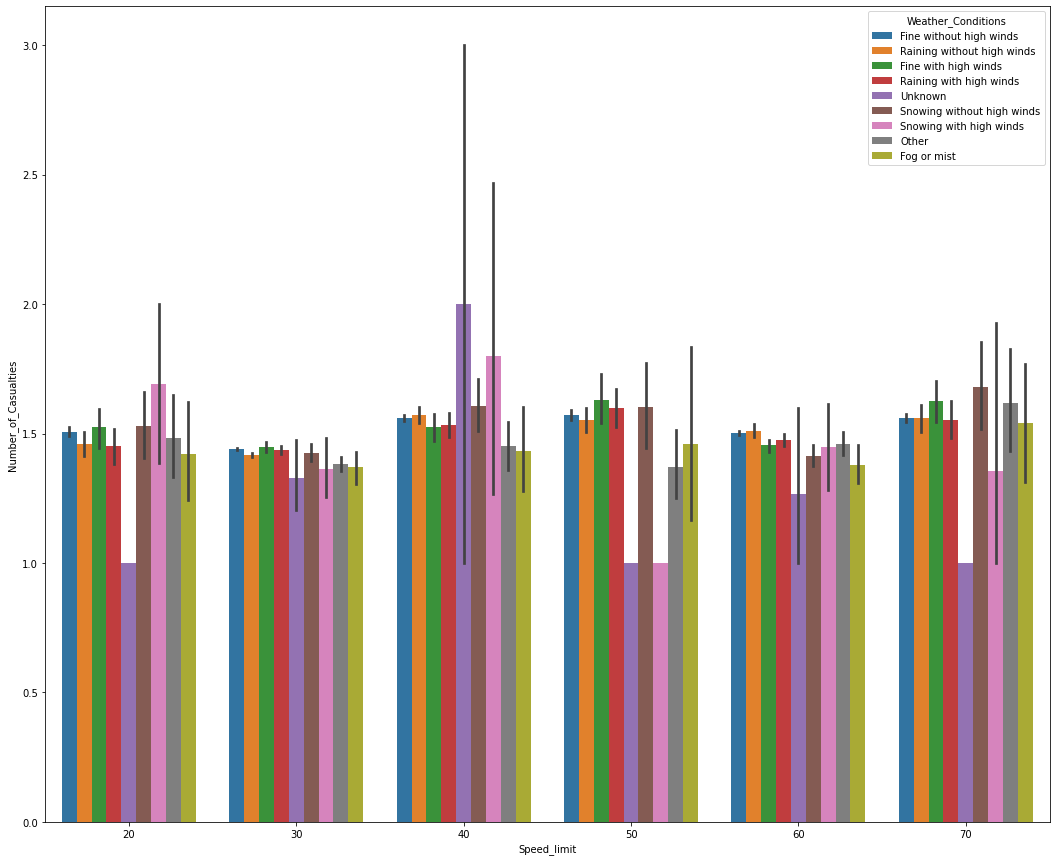

In [ ]:
plt.rcParams["figure.figsize"]=(18,15)
sns.barplot("Speed_limit","Number_of_Casualties",hue="Weather_Conditions",data=train)

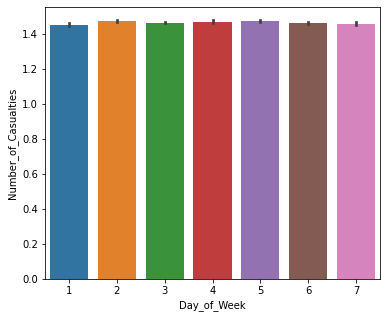

In [ ]:
plt.rcParams["figure.figsize"]=(6,5)
sns.barplot("Day_of_Week","Number_of_Casualties",data=train)

In [ ]:
q1,q3=np.percentile(train['Police_Force'],[25,75])

In [ ]:
print(q1,q3)
iqr=q3-q1
print(iqr)
#find lower and upper fence
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(lower_fence,upper_fence)

12.0 45.0
33.0
-37.5 94.5


In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [ ]:
df_outlier_removed=remove_outlier_IQR(train['Police_Force'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=train.index.difference(df_outlier_removed.index)

In [ ]:
df_outlier_removed.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            478731, 478732, 478733, 478734, 478735, 478736, 478737, 478738,
            478739, 478740],
           dtype='int64', length=458840)

In [ ]:
train_pol = train.iloc[df_outlier_removed.index]

In [ ]:
train_pol.shape

(458840, 25)

In [ ]:
df_outlier_removed=remove_outlier_IQR(train_pol['Number_of_Casualties'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=train_pol.index.difference(df_outlier_removed.index)

In [ ]:
df_outlier_removed.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            478727, 478728, 478731, 478732, 478733, 478734, 478736, 478737,
            478739, 478740],
           dtype='int64', length=443962)

In [ ]:
train_caus = train.iloc[df_outlier_removed.index]

In [ ]:
train_caus.shape

(443962, 25)

#removing outliers from speed_limit

In [ ]:
df_outlier_removed=remove_outlier_IQR(train_caus['Speed_limit'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=train_caus.index.difference(df_outlier_removed.index)

In [ ]:
train_speed = train.iloc[df_outlier_removed.index]

In [ ]:
train_speed.shape

(357719, 25)

#removing outliers from Number of vehicles

In [ ]:
df_outlier_removed=remove_outlier_IQR(train_speed['Number_of_Vehicles'])
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=train_speed.index.difference(df_outlier_removed.index)

In [ ]:
train_vehicle = train.iloc[df_outlier_removed.index]

In [ ]:
train_vehicle.shape

(352683, 25)

In [ ]:
train_vehicle.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF


In [ ]:
type(train_vehicle)

pandas.core.frame.DataFrame

In [ ]:
train_vehicle["Time"]=pd.to_datetime(train_vehicle["Time"],format="%H:%M")
train_vehicle["Time"]=train_vehicle["Time"].round("H")
train_vehicle["time of the day"]=train_vehicle["Time"].dt.hour
train_vehicle.drop("Time",axis=1,inplace=True)
train_vehicle.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,time of the day
0,1,34,2,1,19/12/12,7,344,E10000032,4,395,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,13
1,2,5,2,1,02/11/12,4,102,E09000026,3,13,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,8
2,3,1,2,1,02/11/12,4,531,E10000016,6,8,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,16
3,4,1,1,1,06/05/12,1,7,E08000035,6,13,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,17
4,5,46,1,1,30/06/12,3,519,E10000031,3,24,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,13


In [ ]:
train_vehicle.Date=pd.to_datetime(train_vehicle.Date,format="%d/%m/%y")
train_vehicle["day_in_month"]=train_vehicle.Date.dt.day
train_vehicle["month_in_year"]=train_vehicle.Date.dt.month
train_vehicle["year"]=train_vehicle.Date.dt.year
train_vehicle.drop("Date",axis=1,inplace=True)
train_vehicle.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,time of the day,day_in_month,month_in_year,year
0,1,34,2,1,7,344,E10000032,4,395,Single carriageway,...,Ol or diesel,None,1,Yes,England,OX3 9UP,13,19,12,2012
1,2,5,2,1,4,102,E09000026,3,13,One way street,...,None,None,1,No,England,S35 4EZ,8,2,11,2012
2,3,1,2,1,4,531,E10000016,6,8,Roundabout,...,None,None,1,No,England,BN21 2XR,16,2,11,2012
3,4,1,1,1,1,7,E08000035,6,13,Single carriageway,...,Roadworks,None,1,Yes,England,TA20 3PT,17,6,5,2012
4,5,46,1,1,3,519,E10000031,3,24,Dual carriageway,...,None,None,1,No,England,DN20 0QF,13,30,6,2012


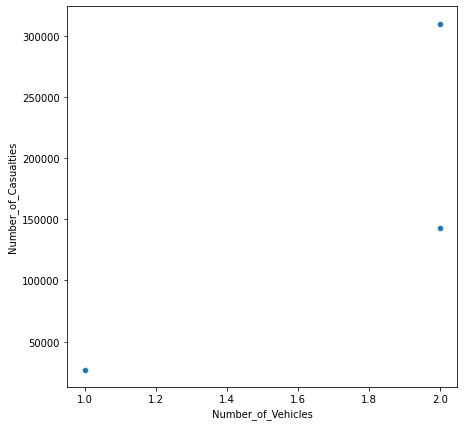

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=train_vehicle["Number_of_Vehicles"],y=train_vehicle.groupby("Number_of_Vehicles").Number_of_Casualties.sum())

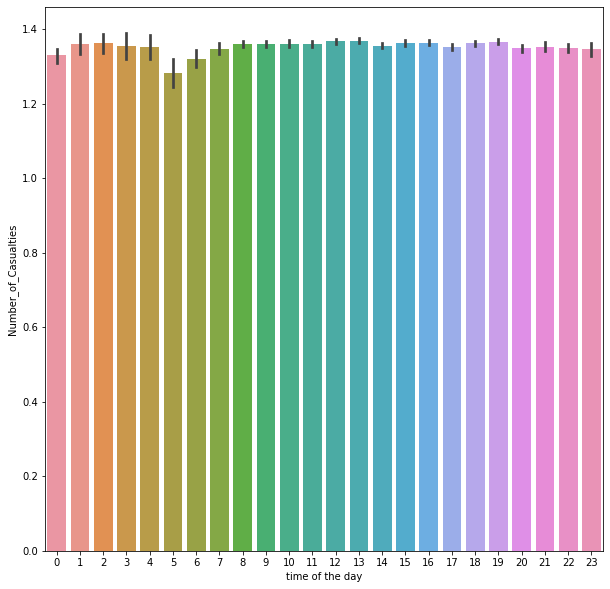

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=train_vehicle["time of the day"],y=train_vehicle['Number_of_Casualties'])

there are less injuries in morning time around 5am to 7am due to less traffic other than this time injuries are constant so lets keep this feature , it has some information.

In [ ]:
accident=pd.DataFrame(train_vehicle.groupby(['postcode'])['Number_of_Casualties'].mean())

In [ ]:
accident.head()

,Number_of_Casualties
postcode,
AB10 1AU,1.500000
AB10 1BD,1.250000
AB10 1BW,1.333333
AB10 1HT,1.000000
AB10 1NJ,2.000000


In [ ]:
train1=pd.merge(train_vehicle, accident, on=['postcode'], how='inner')

In [ ]:
train_vehicle.groupby("postcode").Number_of_Casualties.sum()/train_vehicle.groupby("postcode").Accident_ID.count()

postcode
AB10 1AU    1.500000
AB10 1BD    1.250000
AB10 1BW    1.333333
AB10 1HT    1.000000
AB10 1NJ    2.000000
              ...   
ZE2 9QJ     2.000000
ZE2 9QS     1.333333
ZE2 9RE     1.500000
ZE2 9SB     1.400000
ZE2 9SD     2.000000
Length: 89708, dtype: float64

In [ ]:
train1[train1['postcode']=='AB10 1NJ']['Number_of_Casualties_y'] 

325015    2.0
325016    2.0
Name: Number_of_Casualties_y, dtype: float64

In [ ]:
train1.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties_x,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,...,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,time of the day,day_in_month,month_in_year,year,Number_of_Casualties_y
0,1,34,2,1,7,344,E10000032,4,395,Single carriageway,...,None,1,Yes,England,OX3 9UP,13,19,12,2012,1.0
1,114321,1,1,1,4,728,S12000041,6,5,Single carriageway,...,None,1,Yes,Cymru / Wales,OX3 9UP,14,26,4,2012,1.0
2,263194,62,2,1,4,778,E10000017,6,335,Single carriageway,...,None,1,Yes,Cymru / Wales,OX3 9UP,9,22,9,2012,1.0
3,2,5,2,1,4,102,E09000026,3,13,One way street,...,None,1,No,England,S35 4EZ,8,2,11,2012,1.0
4,29141,11,2,1,6,142,E06000009,6,374,Single carriageway,...,None,2,Yes,England,S35 4EZ,12,29,2,2012,1.0


In [ ]:
train1['year'].value_counts()

2012    352683
Name: year, dtype: int64

as the data is for  one year and one country only so we are going to drop the year column and country column

In [ ]:
train1 = train1.drop(['year','1st_Road_Number','Accident_ID',"postcode","1st_Road_Number","Local_Authority_(Highway)"], axis = 1)

In [ ]:
x_train=train1.drop("Number_of_Casualties_y",axis=1)
y_train=train1["Number_of_Casualties_y"]

In [ ]:
cols=x_train.columns[x_train.dtypes=="object"]
cols

Index(['Road_Type', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'state'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_en=OrdinalEncoder()
x_train[cols]=ord_en.fit_transform(x_train[cols])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,random_state=1,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor(max_depth=25,criterion="squared_error",splitter="best")

In [ ]:
tree_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=25)

In [ ]:
y_predict=tree_model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
print("mean_absolute_error:",mean_absolute_error(Y_train,y_predict))
print("r2_score:",r2_score(Y_train,y_predict))

mean_absolute_error: 0.09846709455324133
r2_score: 0.7226157458090627


In [ ]:
test_predict=tree_model.predict(X_test)

In [ ]:
print("mean_absolute_error:",mean_absolute_error(Y_test,test_predict))
print("r2_score:",r2_score(Y_test,test_predict))

mean_absolute_error: 0.26025451973261066
r2_score: -0.2814406964596794


In [ ]:
test.isnull().sum()

Accident_ID                                     0
Police_Force                                    0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                            1
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
2nd_Road_Class                                  0
2nd_Road_Number                                 0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                        39


In [ ]:
test["Time"]=test["Time"].fillna(test["Time"].mode()[0])
test["Road_Surface_Conditions"]=test["Road_Surface_Conditions"].fillna(test["Road_Surface_Conditions"].mode()[0])
test["Special_Conditions_at_Site"]=test["Special_Conditions_at_Site"].fillna(test["Special_Conditions_at_Site"].mode()[0])

In [ ]:
data=test.copy()

In [ ]:
test[cols]=ord_en.transform(test[cols])
cols

Index(['Road_Type', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'state'],
      dtype='object')

In [ ]:
test=test.drop(['country','Accident_ID',"1st_Road_Number","Local_Authority_(Highway)"], axis = 1)

In [ ]:
test.Date=pd.to_datetime(test.Date,format="%d/%m/%y")
test["day_in_month"]=test.Date.dt.day
test["month_in_year"]=test.Date.dt.month
test["year"]=test.Date.dt.year
test.drop("Date",axis=1,inplace=True)

test["Time"]=pd.to_datetime(test["Time"],format="%H:%M")
test["Time"]=test["Time"].round("H")
test["time of the day"]=test["Time"].dt.hour
test.drop("Time",axis=1,inplace=True)

In [ ]:
test.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,Road_Type,Speed_limit,2nd_Road_Class,2nd_Road_Number,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,day_in_month,month_in_year,year,time of the day
0,13,2,0,6,218,4,3.0,60,6,0,...,3.0,3.0,2,1.0,2.0,HX2 8WH,6,10,2013,13
1,13,2,0,7,157,6,3.0,30,-1,0,...,3.0,3.0,1,0.0,2.0,RM8 1DD,22,4,2013,10
2,13,2,0,3,155,3,2.0,40,3,0,...,3.0,3.0,1,1.0,2.0,SE23 1NH,27,9,2013,19
3,13,2,0,4,26,4,3.0,30,-1,0,...,3.0,3.0,1,1.0,2.0,HU10 7QS,13,3,2013,9
4,14,2,0,1,6,4,3.0,30,3,0,...,3.0,3.0,1,1.0,2.0,BD23 5JL,13,6,2013,15


In [ ]:
test.rename(columns = {'Number_of_Casualties':'Number_of_Casualties_x'}, inplace = True)

In [ ]:
df1=test.copy()

In [ ]:
test=test[list(x_train.columns)]

In [ ]:
test_predictions=tree_model.predict(test)

In [1]:
#test["Accident_risk_index"]=test_predictions

In [ ]:
#test.head()

In [ ]:
#test.info()

In [ ]:
#data["Accident_risk_index"]=test_predictions

In [ ]:
#data.info()

In [ ]:
#sub_final=data.iloc[:,25:28]

In [ ]:
#sub_final = sub_final.drop(['country'],axis=1)

In [ ]:
#sub_final.head()

In [ ]:
#test.shape

In [ ]:
#sub_final.to_csv("result.csv",index=False)

In [ ]:
#result = pd.read_csv("/content/result.csv")

In [ ]:
#result.head()

In [ ]:
df1.columns

Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties_x',
       'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class',
       'Road_Type', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'state', 'postcode', 'day_in_month', 'month_in_year', 'year',
       'time of the day'],
      dtype='object')

In [ ]:
#df1.groupby("postcode")

In [ ]:
list(df1.groupby("postcode").postcode.count().index)

['AB10 1AU',
 'AB10 1PG',
 'AB10 1TT',
 'AB10 1YP',
 'AB10 6LQ',
 'AB10 6NN',
 'AB10 7FT',
 'AB10 7JP',
 'AB10 7LY',
 'AB11 5BD',
 'AB11 5BU',
 'AB11 5EJ',
 'AB11 5HS',
 'AB11 5PA',
 'AB11 5QW',
 'AB11 6BG',
 'AB11 6EZ',
 'AB11 6JS',
 'AB11 6JX',
 'AB11 6JY',
 'AB11 7BH',
 'AB11 7DG',
 'AB11 7LH',
 'AB11 7XY',
 'AB11 8JA',
 'AB11 8SR',
 'AB11 8TD',
 'AB11 9DS',
 'AB11 9PE',
 'AB11 9QQ',
 'AB12 3AF',
 'AB12 3HY',
 'AB12 3JB',
 'AB12 3LL',
 'AB12 3RE',
 'AB12 3ZR',
 'AB12 4LQ',
 'AB12 4TS',
 'AB12 5AA',
 'AB12 5BS',
 'AB12 5UL',
 'AB12 5UT',
 'AB12 5WF',
 'AB12 5YN',
 'AB12 9SA',
 'AB14 0PS',
 'AB14 0RR',
 'AB15 4TN',
 'AB15 4YD',
 'AB15 6BT',
 'AB15 6EE',
 'AB15 8BQ',
 'AB15 8DP',
 'AB15 8GG',
 'AB15 8PD',
 'AB15 8PP',
 'AB15 8PT',
 'AB15 8PX',
 'AB15 8QS',
 'AB15 8RT',
 'AB15 8SP',
 'AB15 8UL',
 'AB15 9LD',
 'AB16 5HU',
 'AB16 5JU',
 'AB16 5UW',
 'AB16 6QL',
 'AB16 6QU',
 'AB16 7PG',
 'AB21 0HU',
 'AB21 0LU',
 'AB21 0PN',
 'AB21 0QS',
 'AB21 0SH',
 'AB21 0TT',
 'AB21 0TX',
 'AB21 7AS',

In [ ]:
#result=result.sort_values(by='postcode')

In [ ]:
#Accident_risk_index= result.groupby('postcode').Accident_risk_index.first()

In [ ]:
#postcode=list(df1.groupby("postcode").postcode.count().index)
#sub_final_df=pd.DataFrame({"postcode":postcode,"Accident_risk_index":Accident_risk_index})

In [ ]:
#sub_final_df.head()

In [ ]:
#sub_final_df.to_csv("sample_submission.csv",index=False)

In [ ]:
#sub_final_df.tail

In [ ]:
#df1['postcode'].equals(sub_final_df['postcode'])

Random Forest algo

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, n_jobs=-1, random_state=0)

In [ ]:
y_pred=rf_model.predict(X_train)

In [ ]:
print("mean_absolute_error:",mean_absolute_error(Y_train,y_pred))
print("r2_score:",r2_score(Y_train,y_pred))

mean_absolute_error: 0.20897500036806968
r2_score: 0.2599216697264304


In [ ]:
test_pred=rf_model.predict(X_test)

In [ ]:
print("mean_absolute_error:",mean_absolute_error(Y_test,test_pred))
print("r2_score:",r2_score(Y_test,test_pred))

mean_absolute_error: 0.20976481582673057
r2_score: 0.24855858867339609


In [ ]:
#test_predictions1=rf_model.predict(test)

In [ ]:
#test["Accident_risk_index"]=test_predictions1

In [ ]:
#test.iloc[:,23]

In [ ]:
#df2 = pd.read_csv("/content/drive/MyDrive/accident risk score/test.csv")

In [ ]:
#df2["Accident_risk_index"]=test_predictions1

In [ ]:
#final=df2.iloc[:,25:28]

In [ ]:
# final = final.drop(['country'],axis=1)
# final.head()

In [ ]:
#list(df2.groupby("postcode").postcode.count().index)

In [ ]:
#final=final.sort_values(by='postcode')

In [ ]:
#Accident_risk_index= final.groupby('postcode').Accident_risk_index.first()

In [ ]:
# postcode=list(df2.groupby("postcode").postcode.count().index)
# final_df=pd.DataFrame({"postcode":postcode,"Accident_risk_index":Accident_risk_index})

In [ ]:
# final_df.head()

In [ ]:
# final_df.to_csv("sample_submission5.csv",index=False)

#Hyper-parameter tuning using Grid Search and Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True], 
              'max_depth': [5],
              'max_features': ['auto'],
               'min_samples_leaf': [3],
               'min_samples_split': [12],
              'n_estimators': [ 15]}

In [ ]:
rfr = RandomForestRegressor(random_state = 1)

In [ ]:
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
grid_search.fit(X_train,Y_train);

In [ ]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 15}


In [ ]:
y_predict=grid_search.predict(X_train)

In [ ]:
print("mean_absolute_error:",mean_absolute_error(Y_train,y_predict))
print("r2_score:",r2_score(Y_train,y_predict))

mean_absolute_error: 0.20942763114706303
r2_score: 0.25577833838994457


In [ ]:
test_predict=grid_search.predict(X_test)

In [ ]:
print("mean_absolute_error:",mean_absolute_error(Y_test,test_predict))
print("r2_score:",r2_score(Y_test,test_predict))

mean_absolute_error: 0.20977836355137006
r2_score: 0.24840190795754247


XGB

In [ ]:
xgb_model = XGBRegressor(max_depth=8, 
                         n_estimators=100, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)

xgb_model.fit(X_train, 
              Y_train, 
              eval_metric="rmse", 
              eval_set=[(X_train, Y_train), (X_test, Y_test)], 
              verbose=20, 
              early_stopping_rounds=20)

[09:10:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.830323	validation_1-rmse:0.828414
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[20]	validation_0-rmse:0.283223	validation_1-rmse:0.281624
[40]	validation_0-rmse:0.265138	validation_1-rmse:0.264583
[60]	validation_0-rmse:0.264453	validation_1-rmse:0.264409
Stopping. Best iteration:
[55]	validation_0-rmse:0.264556	validation_1-rmse:0.264377



XGBRegressor(colsample_bytree=0.7, eta=0.3, max_depth=8, min_child_weight=1000,
             seed=0, subsample=0.7)

In [ ]:
xgb_train_pred = xgb_model.predict(X_train)
xgb_val_pred = xgb_model.predict(X_test)

In [ ]:
print("mean_absolute_error:",mean_absolute_error(Y_train,xgb_train_pred))
print("r2_score:",r2_score(Y_train,xgb_train_pred))

mean_absolute_error: 0.2081956517779643
r2_score: 0.2610340724139505


In [ ]:
print("mean_absolute_error:",mean_absolute_error(Y_test,xgb_val_pred))
print("r2_score:",r2_score(Y_test,xgb_val_pred))

mean_absolute_error: 0.20927553765978874
r2_score: 0.24829352445142971


In [ ]:
test_predict=xgb_model.predict(test)

In [ ]:
test["Accident_risk_index"]=test_predict

In [ ]:
test.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties_x,Day_of_Week,Local_Authority_(District),1st_Road_Class,Road_Type,Speed_limit,2nd_Road_Class,Pedestrian_Crossing-Human_Control,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,time of the day,day_in_month,month_in_year,Accident_risk_index
0,13,2,0,6,218,4,3.0,60,6,2.0,...,0.0,3.0,3.0,2,1.0,2.0,13,6,10,1.266205
1,13,2,0,7,157,6,3.0,30,-1,2.0,...,0.0,3.0,3.0,1,0.0,2.0,10,22,4,1.260789
2,13,2,0,3,155,3,2.0,40,3,2.0,...,4.0,3.0,3.0,1,1.0,2.0,19,27,9,1.253384
3,13,2,0,4,26,4,3.0,30,-1,2.0,...,0.0,3.0,3.0,1,1.0,2.0,9,13,3,1.257399
4,14,2,0,1,6,4,3.0,30,3,2.0,...,0.0,3.0,3.0,1,1.0,2.0,15,13,6,1.261332


In [ ]:
test.iloc[:,22]

0         1.266205
1         1.260789
2         1.253384
3         1.257399
4         1.261332
            ...   
121254    1.257493
121255    1.289152
121256    1.256749
121257    1.260225
121258    1.268786
Name: Accident_risk_index, Length: 121259, dtype: float32

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/accident risk score/test.csv")

In [ ]:
df2["Accident_risk_index"]=test_predict

In [ ]:
final=df2.iloc[:,25:28]

In [ ]:
final = final.drop(['country'],axis=1)
final.head()

,postcode,Accident_risk_index
0,HX2 8WH,1.266205
1,RM8 1DD,1.260789
2,SE23 1NH,1.253384
3,HU10 7QS,1.257399
4,BD23 5JL,1.261332


In [ ]:
list(df2.groupby("postcode").postcode.count().index)

In [ ]:
final=final.sort_values(by='postcode')

In [ ]:
Accident_risk_index= final.groupby('postcode').Accident_risk_index.first()

In [ ]:
postcode=list(df2.groupby("postcode").postcode.count().index)
final_df1=pd.DataFrame({"postcode":postcode,"Accident_risk_index":Accident_risk_index})

In [ ]:
final_df1.head()

,postcode,Accident_risk_index
postcode,,
AB10 1AU,AB10 1AU,1.254067
AB10 1PG,AB10 1PG,1.251159
AB10 1TT,AB10 1TT,1.257285
AB10 1YP,AB10 1YP,1.274435
AB10 6LQ,AB10 6LQ,1.264102


In [ ]:
final_df1.to_csv("sample_submission2.csv",index=False)

In [ ]:
final_df1.shape

(49772, 2)